In [1]:
import os

from PIL import Image

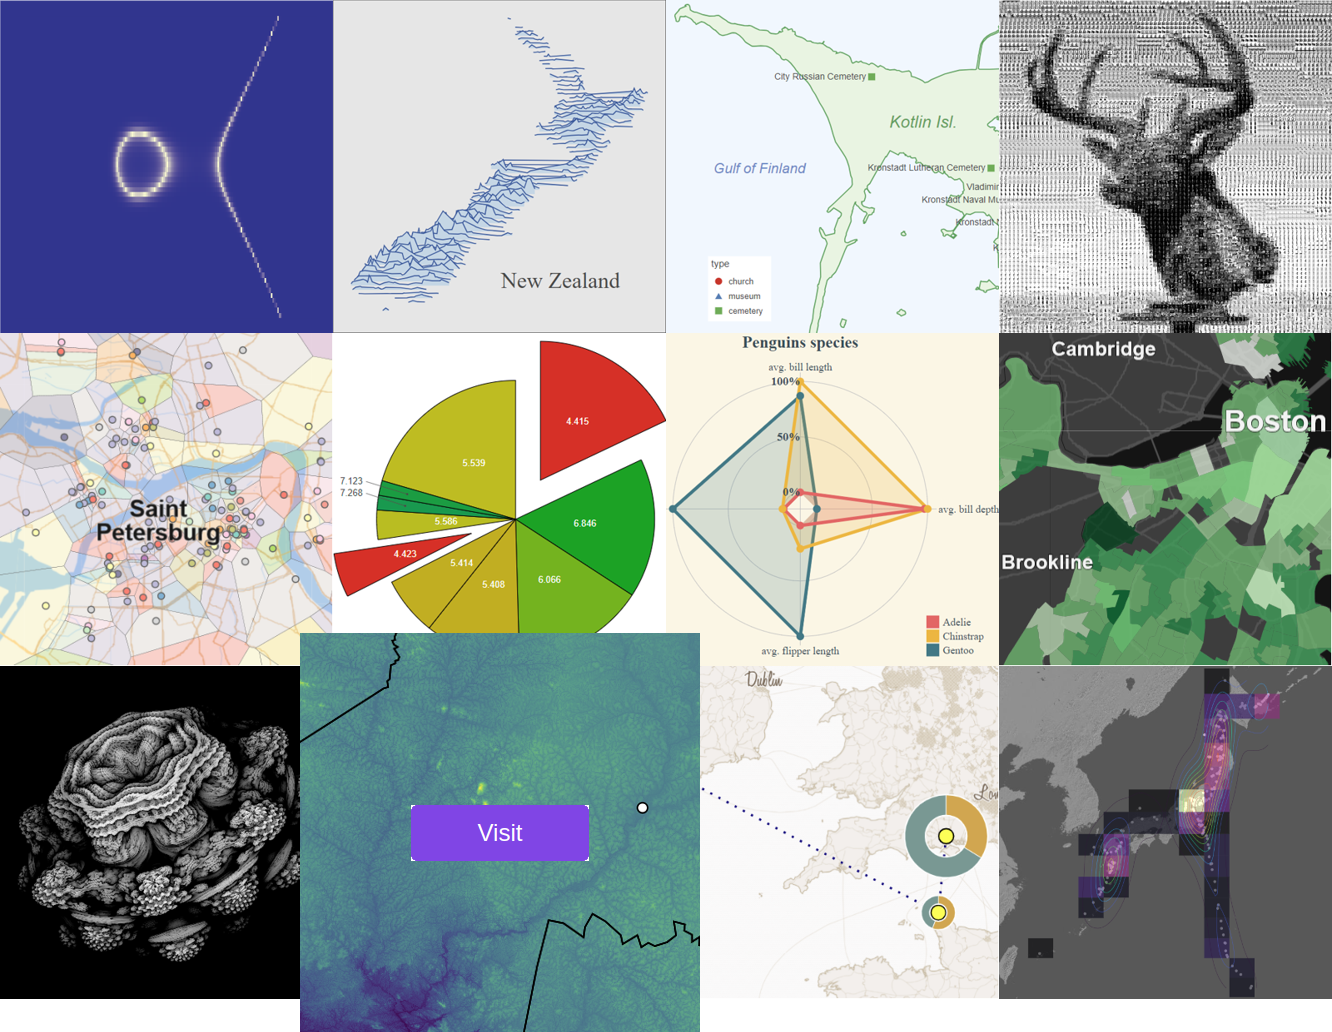

In [2]:
scale = 1.2
selected = (2, 1)
images_dir = "previews"
images_matrix = [
    ["square-how_to_draw_curve", "square-new_zealand_dem_remake", "square-geopandas_kotlin_isl", "square-mosaic_image"],
    ["square-spb_bakeries", "square-world_happiness", "square-palmer_penguins", "square-plotting_airbnb_prices_boston"],
    ["square-mandelbulbs", "square-ivindo_river", "square-titanic", "square-japanese_volcanoes_on_map"],
]

max_width, max_height = None, None
width, height = None, None
dwidth, dheight = None, None
gallery_preview = None

for (i, images_row) in enumerate(images_matrix):
    for (j, image_name) in enumerate(images_row):
        image = Image.open(os.path.join(images_dir, "{0}.png".format(image_name)))
        if width is None:
            max_width, max_height = image.size
            width, height = int(max_width / scale), int(max_height / scale)
            dwidth, dheight = int((max_width - width) / 2), int((max_height - height) / 2)
            total_width = len(images_row) * width
            if selected[1] == 0 or selected[1] == len(images_row) - 1:
                total_width += dwidth
            total_height = len(images_matrix) * height
            if selected[0] == 0 or selected[0] == len(images_matrix) - 1:
                total_height += dheight
            gallery_preview = Image.new("RGBA", (total_width, total_height))
        left = j * width
        top = i * height
        if selected[1] == 0:
            left += dwidth
        if selected[0] == 0:
            top += dheight
        if i == selected[0] and j == selected[1]:
            continue
        gallery_preview.paste(image.resize((width, height)), (left, top))

image_name = images_matrix[selected[0]][selected[1]]
image = Image.open(os.path.join(images_dir, "{0}.png".format(image_name)))
button_image = Image.open("button.png")
image.paste(button_image, (int((max_width - button_image.size[0]) / 2), int((max_height - button_image.size[1]) / 2)))
left = selected[1] * width - dwidth
top = selected[0] * height - dheight
if selected[1] == 0:
    left += dwidth
if selected[0] == 0:
    top += dheight
gallery_preview.paste(image.resize((max_width, max_height)), (left, top))

gallery_preview